<a href="https://colab.research.google.com/github/Serge3006/gans/blob/master/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import os
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
np.random.seed(10)
noise_dim = 100
batch_size = 16
steps_per_epoch = 3750
epochs = 10

save_path = 'fcgan-images'
img_rows, img_cols, channels = 28, 28, 1

In [0]:
x_train = x_train.astype(np.float32)
x_train = (x_train / 255) - 0.5

In [0]:
x_train = x_train.reshape(-1, img_rows*img_cols*channels)

In [0]:
if not os.path.isdir(save_path):
  os.mkdir(save_path)

In [0]:
## Creating the generator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

optimizer = Adam(0.0002, 0.5)

def create_generator():
  generator = Sequential()

  generator.add(Dense(256, input_dim=noise_dim))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))
  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator

In [0]:
def create_discriminator():
  discriminator = Sequential()

  discriminator.add(Dense(1024, input_dim=img_cols*img_rows*channels))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dense(256))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return discriminator

In [0]:
discriminator = create_discriminator()
generator = create_generator()
discriminator.trainable = False

In [0]:
from keras.layers import Input
from keras.models import Model

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [0]:
for epoch in range(epochs):
  for batch in range(steps_per_epoch):
    noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
    fake_x = generator.predict(noise)

    real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
    x= np.concatenate([real_x, fake_x])

    disc_y = np.zeros(2*batch_size)
    disc_y[:batch_size] = 0.9

    d_loss = discriminator.train_on_batch(x, disc_y)

    y_gen = np.ones(batch_size)
    g_loss = gan.train_on_batch(noise, y_gen)

  print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t Generator Loss: {g_loss}')


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



Epoch: 0 	 Discriminator Loss: 0.5494124889373779 	 Generator Loss: 1.3387712240219116
Epoch: 1 	 Discriminator Loss: 0.7275789976119995 	 Generator Loss: 1.1598020792007446
Epoch: 2 	 Discriminator Loss: 0.5566845536231995 	 Generator Loss: 1.5438625812530518
Epoch: 3 	 Discriminator Loss: 0.5177171230316162 	 Generator Loss: 1.8405215740203857
Epoch: 4 	 Discriminator Loss: 0.45358312129974365 	 Generator Loss: 2.4161808490753174
Epoch: 5 	 Discriminator Loss: 0.5324050188064575 	 Generator Loss: 2.290281295776367
Epoch: 6 	 Discriminator Loss: 0.3006547689437866 	 Generator Loss: 2.85671329498291
Epoch: 7 	 Discriminator Loss: 0.46837013959884644 	 Generator Loss: 2.0472922325134277
Epoch: 8 	 Discriminator Loss: 0.38239747285842896 	 Generator Loss: 3.3110923767089844
Epoch: 9 	 Discriminator Loss: 0.30670320987701416 	 Generator Loss: 2.766997814178467


In [0]:
import matplotlib.pyplot as plt

def show_images(noise):
  generated_images = generator.predict(noise)
  plt.figure(figsize=(10, 10))

  for i, image in enumerate(generated_images):
    plt.subplot(10, 10, i+1)
    if channels == 1:
      plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
    else:
      plt.imshow(image.reshape((img_rows, img_cols, channels)))

    plt.axis('off')

  plt.tight_layout()
  plt.show()

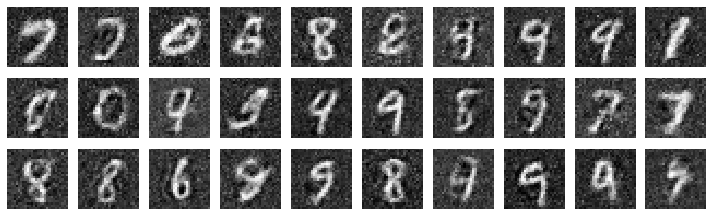

In [0]:
noise = np.random.normal(0, 1, size=(30, noise_dim))
show_images(noise)

## Now with convolution layers

In [0]:
from keras.datasets import cifar10
from keras.layers import Conv2D, Conv2DTranspose, Reshape
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.initializers import RandomNormal

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


The Label for this images of 6


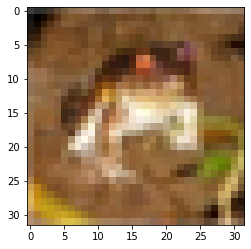

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(f'The Label for this images of {y_train[0][0]}')

In [0]:
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

In [0]:
import numpy as np
x_cats = x_train[np.where(y_train == 3)]
y_cats = y_train[np.where(y_train == 3)]

In [0]:
np.random.seed(42)
batch_size = 16
epochs = 10
steps_per_epoch = 3750
noise_dim = 100
img_rows, img_cols, channels = 32, 32, 3
optimizer = Adam(0.0002, 0.5)

In [0]:
def create_generator_conv():
  generator = Sequential()
  d = 4
  generator.add(Dense(d*d*256, kernel_initializer=RandomNormal(0.0, 0.02), input_dim=noise_dim))
  generator.add(LeakyReLU(0.2))
  # 4x4x256
  generator.add(Reshape((d, d, 256)))
  # 8x8x128
  generator.add(Conv2DTranspose(128, (4, 4), strides=2, kernel_initializer=RandomNormal(0.0, 0.02), padding='same'))
  generator.add(LeakyReLU(0.2))
  # 16x16x128
  generator.add(Conv2DTranspose(128, (4, 4), strides=2, kernel_initializer=RandomNormal(0.0, 0.02), padding='same'))
  generator.add(LeakyReLU(0.2))
  # 32x32x128
  generator.add(Conv2DTranspose(128, (4, 4), strides=2, kernel_initializer=RandomNormal(0.0, 0.02), padding='same'))
  generator.add(LeakyReLU(0.2))

  generator.add(Conv2D(channels, (3,3), padding='same', activation='tanh', kernel_initializer=RandomNormal(0.0, 0.02)))
  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator

In [0]:
def create_discriminator_conv():
  discriminator = Sequential()

  discriminator.add(Conv2D(64, (3,3), padding='same', kernel_initializer=RandomNormal(0.0, 0.02), input_shape=(img_cols, img_rows, channels)))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Conv2D(128, (3,3), padding='same', strides=2, kernel_initializer=RandomNormal(0.0, 0.02)))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Conv2D(128, (3,3), padding='same', strides=2, kernel_initializer=RandomNormal(0.0, 0.02)))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Conv2D(256, (3,3), padding='same', strides=2, kernel_initializer=RandomNormal(0.0, 0.02)))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Flatten())
  discriminator.add(Dropout(0.4))
  discriminator.add(Dense(1, activation='sigmoid'))

  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return discriminator

In [0]:
from keras.layers import Input
from keras.models import Model

generator = create_generator_conv()
discriminator = create_discriminator_conv()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan_model = Model(gan_input, gan_output)
gan_model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [38]:
for epoch in range(epochs):
  for batch in range(steps_per_epoch):
    noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
    fake_x = generator.predict(noise)

    real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
    x= np.concatenate([real_x, fake_x])

    disc_y = np.zeros(2*batch_size)
    disc_y[:batch_size] = 0.9

    d_loss = discriminator.train_on_batch(x, disc_y)

    y_gen = np.ones(batch_size)
    g_loss = gan_model.train_on_batch(noise, y_gen)

  print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t Generator Loss: {g_loss}')


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 	 Discriminator Loss: 0.6758223176002502 	 Generator Loss: 1.094192385673523
Epoch: 1 	 Discriminator Loss: 0.5023048520088196 	 Generator Loss: 1.5067896842956543
Epoch: 2 	 Discriminator Loss: 0.6206567287445068 	 Generator Loss: 1.029911994934082
Epoch: 3 	 Discriminator Loss: 0.6430565714836121 	 Generator Loss: 1.0932891368865967
Epoch: 4 	 Discriminator Loss: 0.5695221424102783 	 Generator Loss: 1.099778413772583
Epoch: 5 	 Discriminator Loss: 0.6402276158332825 	 Generator Loss: 1.076857566833496
Epoch: 6 	 Discriminator Loss: 0.5761481523513794 	 Generator Loss: 0.9966379404067993
Epoch: 7 	 Discriminator Loss: 0.616697371006012 	 Generator Loss: 1.1192307472229004
Epoch: 8 	 Discriminator Loss: 0.6004664301872253 	 Generator Loss: 1.1027448177337646
Epoch: 9 	 Discriminator Loss: 0.6180393695831299 	 Generator Loss: 1.1951820850372314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

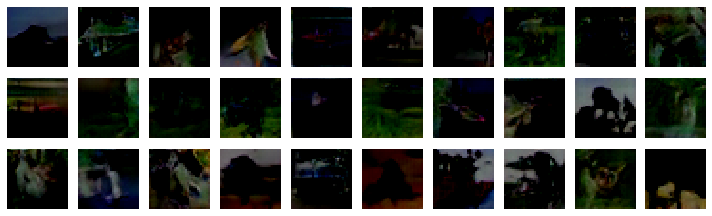

In [48]:
noise = np.random.normal(0, 1, size=(30, noise_dim))
show_images(noise)